# Introduction to Data Science - Linear Regression

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [8]:
population_df = pd.read_csv('../data/population_df.csv')
population_df

,Gender,Education % 15-24 years Second degree and special vocational training degree,Education % 15-24 years Lowest higher and lower university level,Education % 15-24 years Higher university degree and research training,Education % 15-24 years All levels of education,Education % 15-24 years Elementary or unknown,Education % 15-24 years Total graduates,Education % 25-44 years Second degree and special vocational training degree,Education % 25-44 years Lowest higher and lower university level,Education % 25-44 years Higher university degree and research training,...,Taxable income per person,Married couple without children,Married couple and children,Unmarried couple without children,Unmarried couple and children,Father and children,Mother and children,municipality,code,name
0,0,0.059870,0.008553,0.000342,0.116319,0.047554,0.068765,0.105371,0.083134,0.157030,...,44080.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,91,10,Kruununhaka
1,1,0.079023,0.016667,0.000575,0.145402,0.049138,0.096264,0.074138,0.103736,0.157471,...,44080.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,91,10,Kruununhaka
2,0,0.058338,0.007025,0.000000,0.100794,0.035431,0.065363,0.168601,0.136225,0.140195,...,30519.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,91,101,Vilhonvuori
3,1,0.088615,0.018624,0.001502,0.143286,0.034545,0.108741,0.123160,0.141484,0.147792,...,30519.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,91,101,Vilhonvuori
4,0,0.056744,0.008216,0.000382,0.115017,0.049675,0.065342,0.107375,0.081582,0.138135,...,47560.0,0.354232,0.227415,0.243374,0.058991,0.021659,0.094329,91,101,Vironniemen peruspiiri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,1,0.046091,0.006647,0.000399,0.113049,0.059912,0.053136,0.101443,0.095361,0.100946,...,28197.0,0.299079,0.275851,0.172889,0.083733,0.022858,0.145590,91,997,Esikaupungit
364,0,0.068623,0.009455,0.000423,0.122246,0.043744,0.078502,0.148989,0.112253,0.144381,...,36839.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,91,998,Kantakaupunki
365,1,0.088223,0.017459,0.001057,0.147080,0.040342,0.106738,0.100800,0.129216,0.164055,...,36839.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,91,998,Kantakaupunki
366,0,0.039430,0.002767,0.000000,0.142225,0.100028,0.042197,0.148727,0.036386,0.039568,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91,999,Muut


Filter only basic level regions.

In [11]:
population_df = population_df[~population_df['name'].str.contains('peruspiiri')]
population_df

,Gender,Education % 15-24 years Second degree and special vocational training degree,Education % 15-24 years Lowest higher and lower university level,Education % 15-24 years Higher university degree and research training,Education % 15-24 years All levels of education,Education % 15-24 years Elementary or unknown,Education % 15-24 years Total graduates,Education % 25-44 years Second degree and special vocational training degree,Education % 25-44 years Lowest higher and lower university level,Education % 25-44 years Higher university degree and research training,...,Taxable income per person,Married couple without children,Married couple and children,Unmarried couple without children,Unmarried couple and children,Father and children,Mother and children,municipality,code,name
0,0,0.059870,0.008553,0.000342,0.116319,0.047554,0.068765,0.105371,0.083134,0.157030,...,44080.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,91,10,Kruununhaka
1,1,0.079023,0.016667,0.000575,0.145402,0.049138,0.096264,0.074138,0.103736,0.157471,...,44080.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,91,10,Kruununhaka
2,0,0.058338,0.007025,0.000000,0.100794,0.035431,0.065363,0.168601,0.136225,0.140195,...,30519.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,91,101,Vilhonvuori
3,1,0.088615,0.018624,0.001502,0.143286,0.034545,0.108741,0.123160,0.141484,0.147792,...,30519.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,91,101,Vilhonvuori
6,0,0.064842,0.009263,0.000421,0.111579,0.037053,0.074526,0.167158,0.135579,0.182316,...,36204.0,0.291057,0.194038,0.336585,0.087263,0.014092,0.076965,91,102,Kalasatama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,1,0.046091,0.006647,0.000399,0.113049,0.059912,0.053136,0.101443,0.095361,0.100946,...,28197.0,0.299079,0.275851,0.172889,0.083733,0.022858,0.145590,91,997,Esikaupungit
364,0,0.068623,0.009455,0.000423,0.122246,0.043744,0.078502,0.148989,0.112253,0.144381,...,36839.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,91,998,Kantakaupunki
365,1,0.088223,0.017459,0.001057,0.147080,0.040342,0.106738,0.100800,0.129216,0.164055,...,36839.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,91,998,Kantakaupunki
366,0,0.039430,0.002767,0.000000,0.142225,0.100028,0.042197,0.148727,0.036386,0.039568,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91,999,Muut


In [12]:
population_df = population_df.drop(['municipality', 'code', 'name'], axis=1)
population_df

,Gender,Education % 15-24 years Second degree and special vocational training degree,Education % 15-24 years Lowest higher and lower university level,Education % 15-24 years Higher university degree and research training,Education % 15-24 years All levels of education,Education % 15-24 years Elementary or unknown,Education % 15-24 years Total graduates,Education % 25-44 years Second degree and special vocational training degree,Education % 25-44 years Lowest higher and lower university level,Education % 25-44 years Higher university degree and research training,...,Labor force,Outside the labor force,Taxable income per housing association,Taxable income per person,Married couple without children,Married couple and children,Unmarried couple without children,Unmarried couple and children,Father and children,Mother and children
0,0,0.059870,0.008553,0.000342,0.116319,0.047554,0.068765,0.105371,0.083134,0.157030,...,0.277073,0.184111,81443.0,44080.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563
1,1,0.079023,0.016667,0.000575,0.145402,0.049138,0.096264,0.074138,0.103736,0.157471,...,0.306620,0.232195,81443.0,44080.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563
2,0,0.058338,0.007025,0.000000,0.100794,0.035431,0.065363,0.168601,0.136225,0.140195,...,0.337479,0.158090,48032.0,30519.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455
3,1,0.088615,0.018624,0.001502,0.143286,0.034545,0.108741,0.123160,0.141484,0.147792,...,0.303888,0.200543,48032.0,30519.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455
6,0,0.064842,0.009263,0.000421,0.111579,0.037053,0.074526,0.167158,0.135579,0.182316,...,0.326926,0.159760,71436.0,36204.0,0.291057,0.194038,0.336585,0.087263,0.014092,0.076965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,1,0.046091,0.006647,0.000399,0.113049,0.059912,0.053136,0.101443,0.095361,0.100946,...,0.259391,0.265282,55559.0,28197.0,0.299079,0.275851,0.172889,0.083733,0.022858,0.145590
364,0,0.068623,0.009455,0.000423,0.122246,0.043744,0.078502,0.148989,0.112253,0.144381,...,0.284524,0.184181,62736.0,36839.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751
365,1,0.088223,0.017459,0.001057,0.147080,0.040342,0.106738,0.100800,0.129216,0.164055,...,0.309781,0.221443,62736.0,36839.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751
366,0,0.039430,0.002767,0.000000,0.142225,0.100028,0.042197,0.148727,0.036386,0.039568,...,0.288968,0.334599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Correlation of variables.

In [13]:
corr = population_df.corr()

<AxesSubplot:>

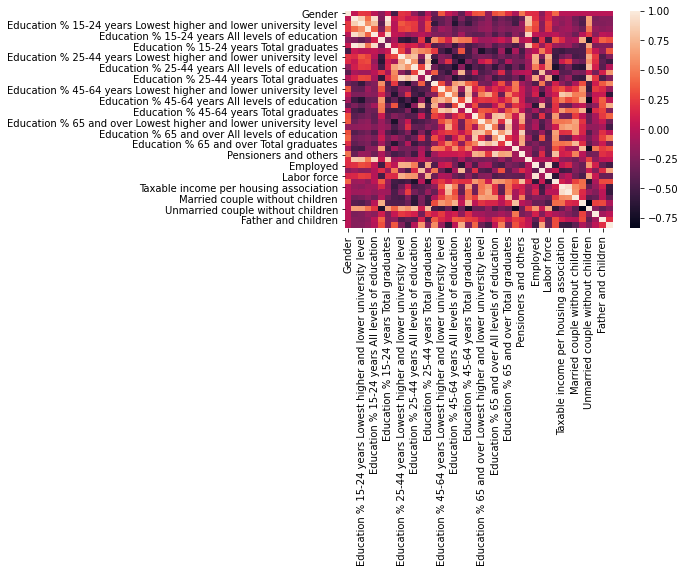

In [14]:
sns.heatmap(corr)

## Linear Regression

In [20]:
y = population_df['Labor force']
X = population_df.drop('Labor force', axis=1)

In [22]:
model = sm.OLS(y, X, missing='drop').fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            Labor force   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.306e+15
Date:                Sun, 08 Oct 2023   Prob (F-statistic):                        0.00
Time:                        19:08:19   Log-Likelihood:                          2505.9
No. Observations:                 147   AIC:                                     -4934.
Df Residuals:                     108   BIC:                                     -4817.
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
                                                                                   coef    std err          t      P>|t|